In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Langkah 1: Memuat Dataset
# Lokasi dataset (pastikan dataset berisi folder jerawat, kusam, komedo, dan kerutan)
dataset_dir = './dataset6/'

In [38]:
# Langkah 2: Visualisasi Jumlah Data
# Menghitung jumlah data untuk setiap kelas
class_names = os.listdir(dataset_dir)
class_counts = {}

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    num_images = len(os.listdir(class_dir))
    class_counts[class_name] = num_images

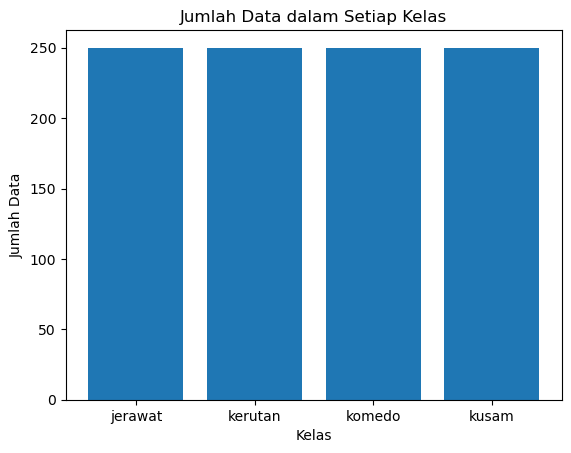

In [39]:
# Visualisasi jumlah data dalam grafik
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data dalam Setiap Kelas')
plt.show()

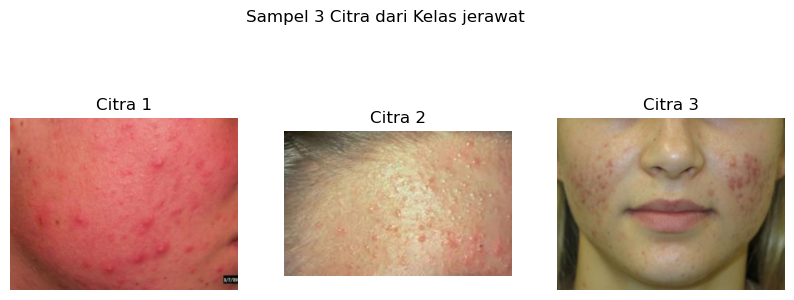

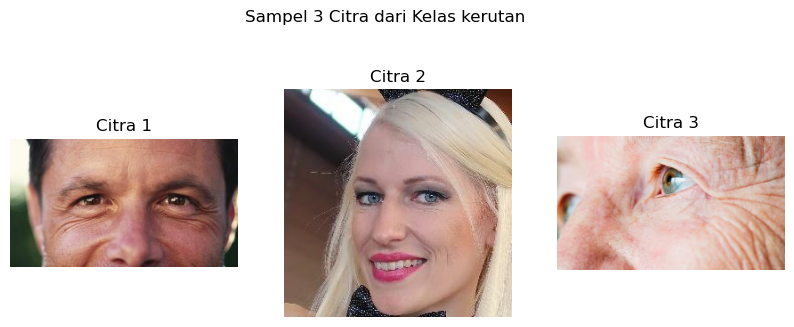

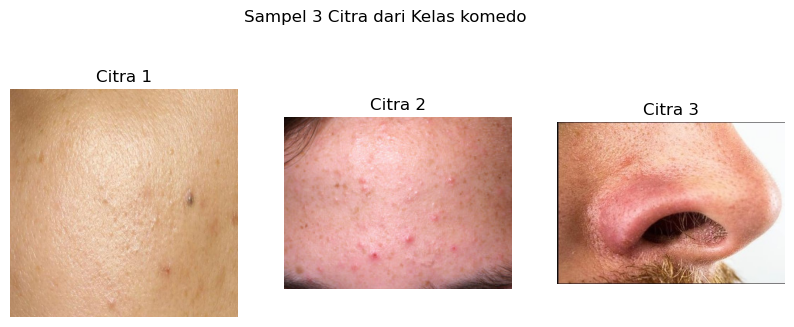

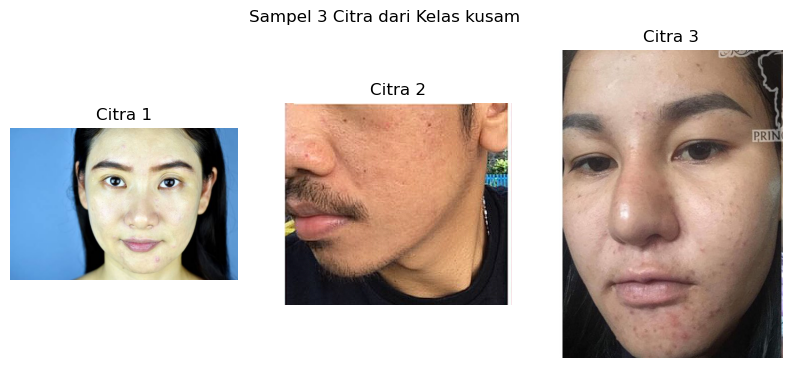

In [40]:
import random
# Menampilkan 3 citra acak dari setiap kelas
num_images_to_display = 3  # Ubah sesuai dengan jumlah citra yang ingin ditampilkan

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    image_files = os.listdir(class_dir)
    random.shuffle(image_files)  # Acak urutan citra
    image_files_to_display = image_files[:num_images_to_display]  # Ambil 3 citra pertama

    plt.figure(figsize=(10, 4))
    plt.suptitle(f'Sampel 3 Citra dari Kelas {class_name}')
    
    for i, image_file in enumerate(image_files_to_display):
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, num_images_to_display, i + 1)
        plt.imshow(image)
        plt.title(f'Citra {i + 1}')
        plt.axis('off')
    
    plt.show()

In [41]:
# Langkah 3: Preprocessing Data
# Membangun generator data tanpa augmentasi
batch_size = 32
image_size = (224, 224)

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Memisahkan data menjadi data validasi (20%) dan data pelatihan (80%)
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Menggunakan subset pelatihan
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Menggunakan subset validasi
)


Found 800 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


# Model 1

In [11]:
# Langkah 4: Membangun Model
# Menggunakan model MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # Menonaktifkan pembelajaran pada lapisan awal

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
%%time
# Langkah 5: Pelatihan Model
epochs = 5  # Sesuaikan dengan jumlah yang diinginkan

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/5
25/25 [==============================] - 28s 997ms/step - loss: 0.8967 - accuracy: 0.6125 - val_loss: 0.5265 - val_accuracy: 0.8050
Epoch 2/5
25/25 [==============================] - 24s 954ms/step - loss: 0.4569 - accuracy: 0.8388 - val_loss: 0.3966 - val_accuracy: 0.8550
Epoch 3/5
25/25 [==============================] - 27s 1s/step - loss: 0.3513 - accuracy: 0.8813 - val_loss: 0.3571 - val_accuracy: 0.8700
Epoch 4/5
25/25 [==============================] - 25s 984ms/step - loss: 0.3032 - accuracy: 0.8975 - val_loss: 0.3283 - val_accuracy: 0.8800
Epoch 5/5
25/25 [==============================] - 25s 998ms/step - loss: 0.2679 - accuracy: 0.9162 - val_loss: 0.3161 - val_accuracy: 0.8950
CPU times: total: 10min 1s
Wall time: 2min 10s


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


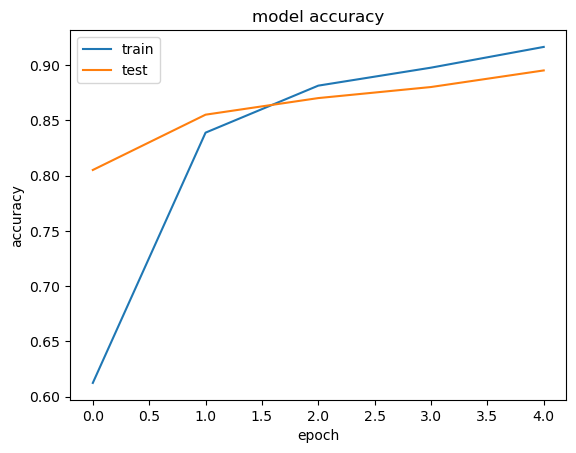

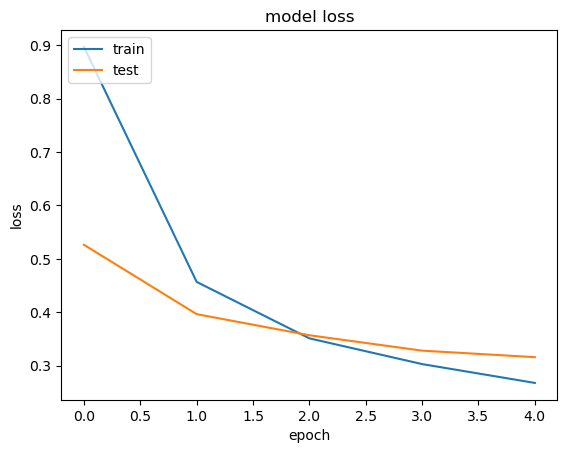

In [14]:
from matplotlib import pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
%%time
# Langkah 6: Evaluasi Model
loss, accuracy = model.evaluate(val_generator)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy*100:.2f}%')

7/7 [==============================] - 5s 639ms/step - loss: 0.3161 - accuracy: 0.8950
Loss: 0.3161
Accuracy: 89.50%
CPU times: total: 21.7 s
Wall time: 5.03 s


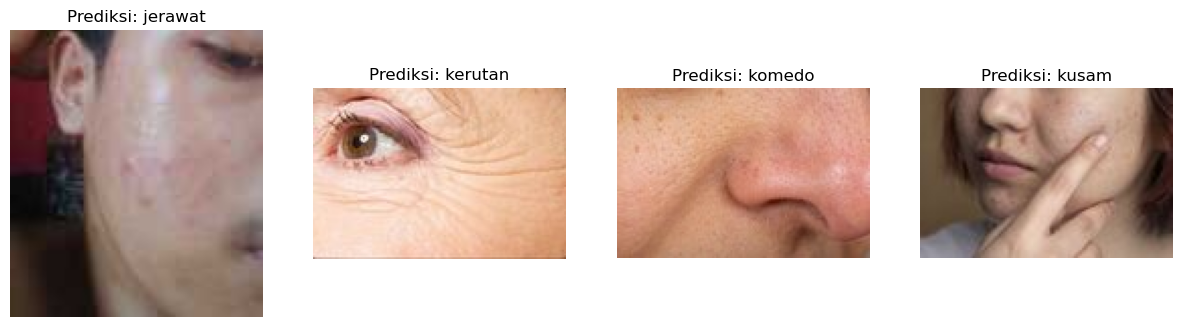

In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke folder dengan citra-citra yang ingin diuji
folder_path = 'test/test1/'

# Membaca citra dari folder dan melakukan prediksi
predictions = []
image_names = []

for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Pastikan hanya file gambar yang dibaca
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ubah mode warna ke RGB jika diperlukan
        image = cv2.resize(image, (224, 224))  # Sesuaikan ukuran gambar dengan ukuran input model

        # Normalisasi gambar
        image = image / 255.0  # Normalisasi sesuai dengan preprocessing yang dilakukan saat pelatihan

        # Lakukan prediksi
        prediction = model.predict(np.expand_dims(image, axis=0))[0]
        predicted_class = np.argmax(prediction)
        
        # Nama kelas berdasarkan indeks
        class_names = ['jerawat', 'kerutan', 'komedo', 'kusam']
        class_name = class_names[predicted_class]

        # Simpan hasil prediksi
        predictions.append(class_name)
        image_names.append(filename)

# Menampilkan hasil prediksi dalam bentuk citra dan teks
plt.figure(figsize=(15, 10))
for i in range(len(predictions)):
    plt.subplot(1, len(predictions), i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(folder_path, image_names[i])), cv2.COLOR_BGR2RGB))
    plt.title(f'Prediksi: {predictions[i]}')
    plt.axis('off')

plt.show()

In [21]:
# Import library yang diperlukan
from tensorflow.keras.models import save_model

# Simpan model ke dalam file .h5
model.save('./HASIL/Skenario 2/skenario2.h5')


# DENSE

In [42]:
# Mendefinisikan model MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Mendefinisikan model MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Mengatur layer base_model agar tidak dilatih (frozen)
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
%%time
# Train the model with validation data
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,  # Adjust the number of epochs as needed
    validation_data=val_generator,  # Include validation data here
    validation_steps=len(val_generator),  # Number of validation steps per epoch
    verbose=1)

Epoch 1/5
25/25 [==============================] - 23s 854ms/step - loss: 0.6846 - accuracy: 0.7650 - val_loss: 0.3163 - val_accuracy: 0.8700
Epoch 2/5
25/25 [==============================] - 22s 881ms/step - loss: 0.1995 - accuracy: 0.9337 - val_loss: 0.3119 - val_accuracy: 0.9000
Epoch 3/5
25/25 [==============================] - 23s 902ms/step - loss: 0.0858 - accuracy: 0.9750 - val_loss: 0.2985 - val_accuracy: 0.8900
Epoch 4/5
25/25 [==============================] - 22s 900ms/step - loss: 0.0595 - accuracy: 0.9837 - val_loss: 0.2768 - val_accuracy: 0.8950
Epoch 5/5
25/25 [==============================] - 23s 915ms/step - loss: 0.0344 - accuracy: 0.9962 - val_loss: 0.3394 - val_accuracy: 0.8750
CPU times: total: 9min 29s
Wall time: 1min 53s


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


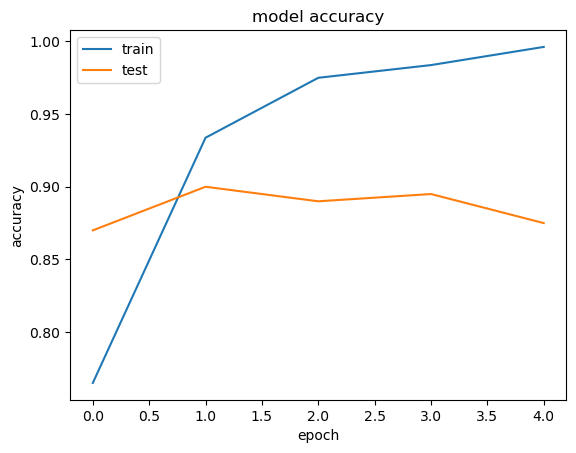

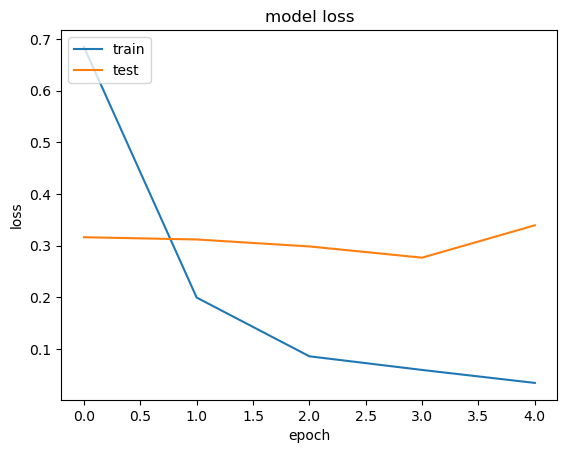

In [44]:
from matplotlib import pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
%%time
model.evaluate(val_generator)

7/7 [==============================] - 4s 574ms/step - loss: 0.3394 - accuracy: 0.8750
CPU times: total: 21 s
Wall time: 4.73 s


[0.339390367269516, 0.875]

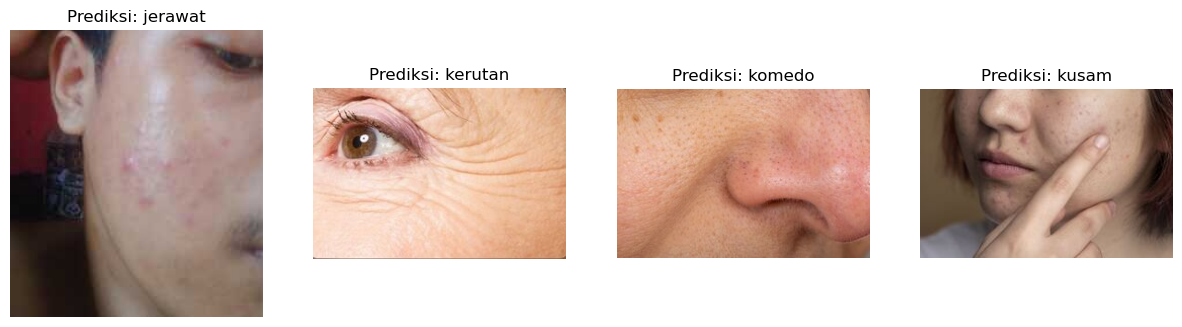

In [50]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke folder dengan citra-citra yang ingin diuji
folder_path = 'test/test/rendah'

# Membaca citra dari folder dan melakukan prediksi
predictions = []
image_names = []

for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Pastikan hanya file gambar yang dibaca
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ubah mode warna ke RGB jika diperlukan
        image = cv2.resize(image, (224, 224))  # Sesuaikan ukuran gambar dengan ukuran input model

        # Normalisasi gambar
        image = image / 255.0  # Normalisasi sesuai dengan preprocessing yang dilakukan saat pelatihan

        # Lakukan prediksi
        prediction = model.predict(np.expand_dims(image, axis=0))[0]
        predicted_class = np.argmax(prediction)
        
        # Nama kelas berdasarkan indeks
        class_names = ['jerawat', 'kerutan', 'komedo', 'kusam']
        class_name = class_names[predicted_class]

        # Simpan hasil prediksi
        predictions.append(class_name)
        image_names.append(filename)

# Menampilkan hasil prediksi dalam bentuk citra dan teks
plt.figure(figsize=(15, 10))
for i in range(len(predictions)):
    plt.subplot(1, len(predictions), i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(folder_path, image_names[i])), cv2.COLOR_BGR2RGB))
    plt.title(f'Prediksi: {predictions[i]}')
    plt.axis('off')

plt.show()

In [51]:
# Import library yang diperlukan
from tensorflow.keras.models import save_model

# Simpan model ke dalam file .h5
model.save('./HASIL/Skenario 9/skenario9.h5')


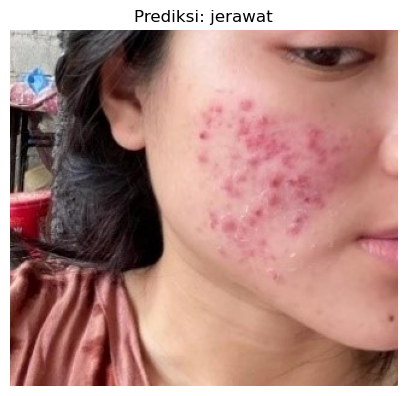

In [15]:
import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi jendela tkinter (GUI)
root = tk.Tk()
root.withdraw()  # Sembunyikan jendela utama

# Meminta pengguna untuk memilih file gambar
file_path = filedialog.askopenfilename(title="Pilih Gambar", filetypes=[("Image Files", "*.jpg *.jpeg *.png")])

# Cek apakah pengguna memilih file
if file_path:
    # Membaca gambar yang dipilih
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # Normalisasi gambar
    image = image / 255.0

    # Lakukan prediksi
    prediction = model.predict(np.expand_dims(image, axis=0))[0]
    predicted_class = np.argmax(prediction)

    # Nama kelas berdasarkan indeks
    class_names = ['jerawat', 'kerutan', 'komedo', 'kusam']
    class_name = class_names[predicted_class]

    # Menampilkan hasil prediksi dalam bentuk citra dan teks
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB))
    plt.title(f'Prediksi: {class_name}')
    plt.axis('off')
    plt.show()
else:
    print("Anda belum memilih gambar.")

# Tutup jendela tkinter
root.destroy()

# Load Model

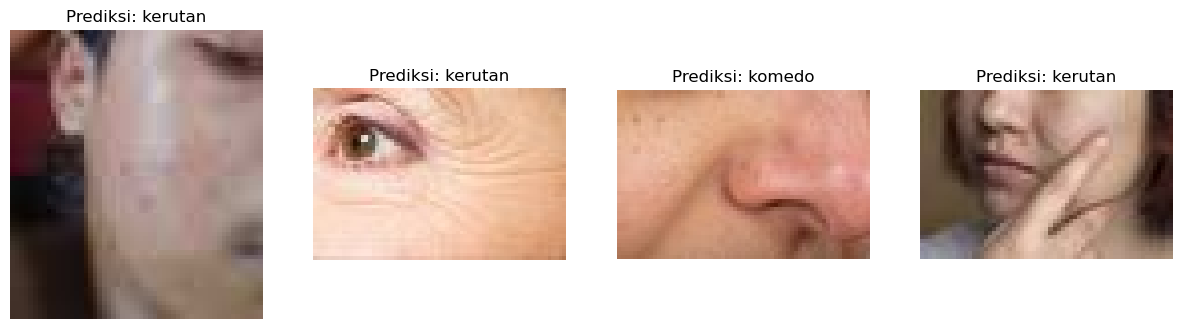

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load model yang telah Anda simpan
model = load_model('./HASIL/Skenario 1/skenario1.h5')  # Ganti 'nama_model.h5' dengan nama file model Anda

# Path ke folder dengan citra-citra yang ingin diuji
folder_path = 'test/test/'

# Membaca citra dari folder dan melakukan prediksi
predictions = []
image_names = []

for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Pastikan hanya file gambar yang dibaca
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ubah mode warna ke RGB jika diperlukan
        image = cv2.resize(image, (224, 224))  # Sesuaikan ukuran gambar dengan ukuran input model

        # Normalisasi gambar
        image = image / 255.0  # Normalisasi sesuai dengan preprocessing yang dilakukan saat pelatihan

        # Lakukan prediksi
        prediction = model.predict(np.expand_dims(image, axis=0))[0]
        predicted_class = np.argmax(prediction)
        
        # Nama kelas berdasarkan indeks
        class_names = ['jerawat', 'kerutan', 'komedo', 'kusam']
        class_name = class_names[predicted_class]

        # Simpan hasil prediksi
        predictions.append(class_name)
        image_names.append(filename)

# Menampilkan hasil prediksi dalam bentuk citra dan teks
plt.figure(figsize=(15, 10))
for i in range(len(predictions)):
    plt.subplot(1, len(predictions), i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(folder_path, image_names[i])), cv2.COLOR_BGR2RGB))
    plt.title(f'Prediksi: {predictions[i]}')
    plt.axis('off')

plt.show()


# Model 2

In [67]:
MobileNetV2.trainable = True

In [68]:
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model


# Load MobileNetV2 pre-trained model
base_model2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the first 100 layers (up to the bottleneck block)
for layer in base_model2.layers[:120]:
    layer.trainable = False

# Add custom head on top of MobileNetV2
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(4, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
num_classes = 4  # Ganti dengan jumlah kelas dalam dataset Anda
predictions = Dense(num_classes, activation='softmax')(x)

# Create a new model
model2 = Model(inputs=base_model2.input, outputs=predictions)

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [69]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [70]:
%%time
# Langkah 5: Pelatihan Model
epochs = 5  # Sesuaikan dengan jumlah yang diinginkan

history2 = model2.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/5
25/25 [==============================] - 24s 863ms/step - loss: 1.3197 - accuracy: 0.4175 - val_loss: 4.3900 - val_accuracy: 0.2700
Epoch 2/5
25/25 [==============================] - 22s 890ms/step - loss: 1.2682 - accuracy: 0.4325 - val_loss: 3.9851 - val_accuracy: 0.2500
Epoch 3/5
25/25 [==============================] - 25s 988ms/step - loss: 1.2089 - accuracy: 0.4963 - val_loss: 3.0615 - val_accuracy: 0.2500
Epoch 4/5
25/25 [==============================] - 25s 987ms/step - loss: 1.1546 - accuracy: 0.4737 - val_loss: 4.3229 - val_accuracy: 0.2550
Epoch 5/5
25/25 [==============================] - 25s 989ms/step - loss: 1.1617 - accuracy: 0.4875 - val_loss: 1.1149 - val_accuracy: 0.6350
CPU times: total: 10min 48s
Wall time: 2min


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


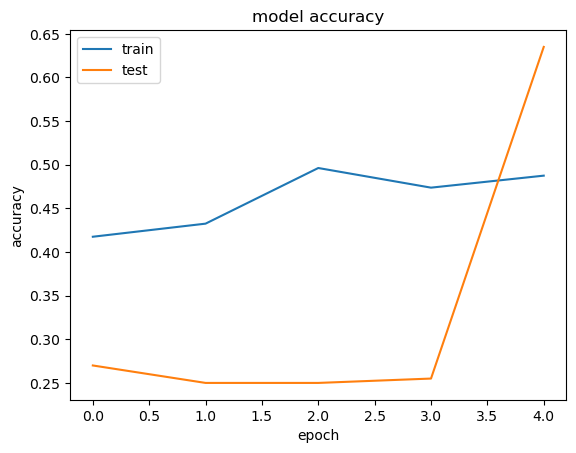

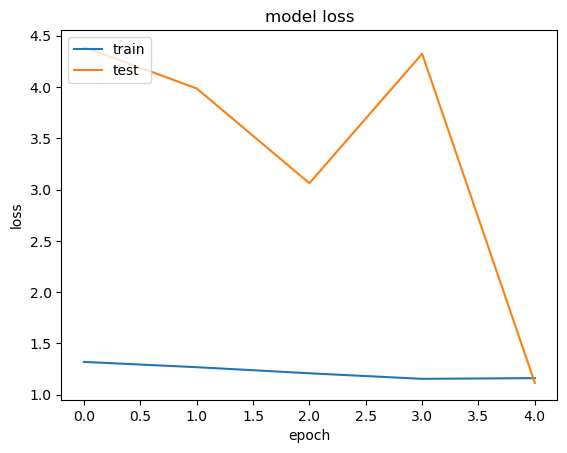

In [71]:
from matplotlib import pyplot as plt

# list all data in history
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
%%time
# Langkah 6: Evaluasi Model
loss, accuracy = model2.evaluate(val_generator)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy*100:.2f}%')

7/7 [==============================] - 4s 488ms/step - loss: 1.1149 - accuracy: 0.6350
Loss: 1.1149
Accuracy: 63.50%
CPU times: total: 20.7 s
Wall time: 4.12 s


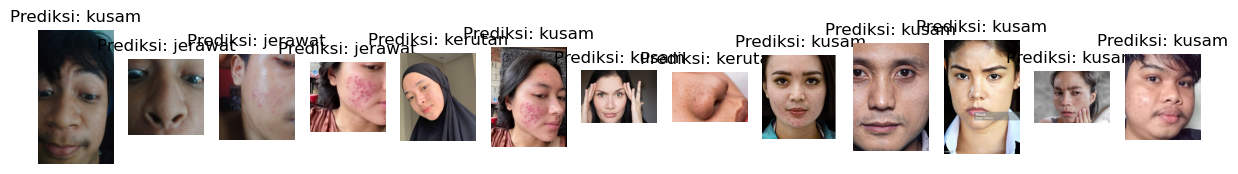

In [74]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke folder dengan citra-citra yang ingin diuji
folder_path = 'test/test/rendah'

# Membaca citra dari folder dan melakukan prediksi
predictions = []
image_names = []

for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Pastikan hanya file gambar yang dibaca
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ubah mode warna ke RGB jika diperlukan
        image = cv2.resize(image, (224, 224))  # Sesuaikan ukuran gambar dengan ukuran input model

        # Normalisasi gambar
        image = image / 255.0  # Normalisasi sesuai dengan preprocessing yang dilakukan saat pelatihan

        # Lakukan prediksi
        prediction = model2.predict(np.expand_dims(image, axis=0))[0]
        predicted_class = np.argmax(prediction)
        
        # Nama kelas berdasarkan indeks
        class_names = ['jerawat', 'kerutan', 'komedo', 'kusam']
        class_name = class_names[predicted_class]

        # Simpan hasil prediksi
        predictions.append(class_name)
        image_names.append(filename)

# Menampilkan hasil prediksi dalam bentuk citra dan teks
plt.figure(figsize=(15, 10))
for i in range(len(predictions)):
    plt.subplot(1, len(predictions), i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(folder_path, image_names[i])), cv2.COLOR_BGR2RGB))
    plt.title(f'Prediksi: {predictions[i]}')
    plt.axis('off')

plt.show()